# Introduction to Robot Intelligence HW 4: Coding Questions

The is the coding potion of Homework 4. For submission instructions, please see the theory portion of Homework 4.

This portion of the homework consists of a single problem, which extends that on last week's homework.

## Problem 1: Inverse Kinematics for a Simple Arm


Consider the robot arm pictured below. This arm consists of **three** different joints. We can enumerate these joints as *joint 1*, *joint 2*, and *joint 3* from left-to-right as pictured in the illustration below on the left, with *joint 3* being the "end effector," i.e. the joint furthest on the periphery. The joints of the arm are interceded by its links, $a_1$, $a_2$, and $a_3$, as shown in the illustration on the right.

In this problem, we would like you to implement a class representing **inverse kinematics** for **POSITION ONLY** (NOT ORIENTATION) on this robot arm. **You can (and should) reference your code from the last homework in your solution** -- it is for this reason that the test cases from the last homework are included here as well.

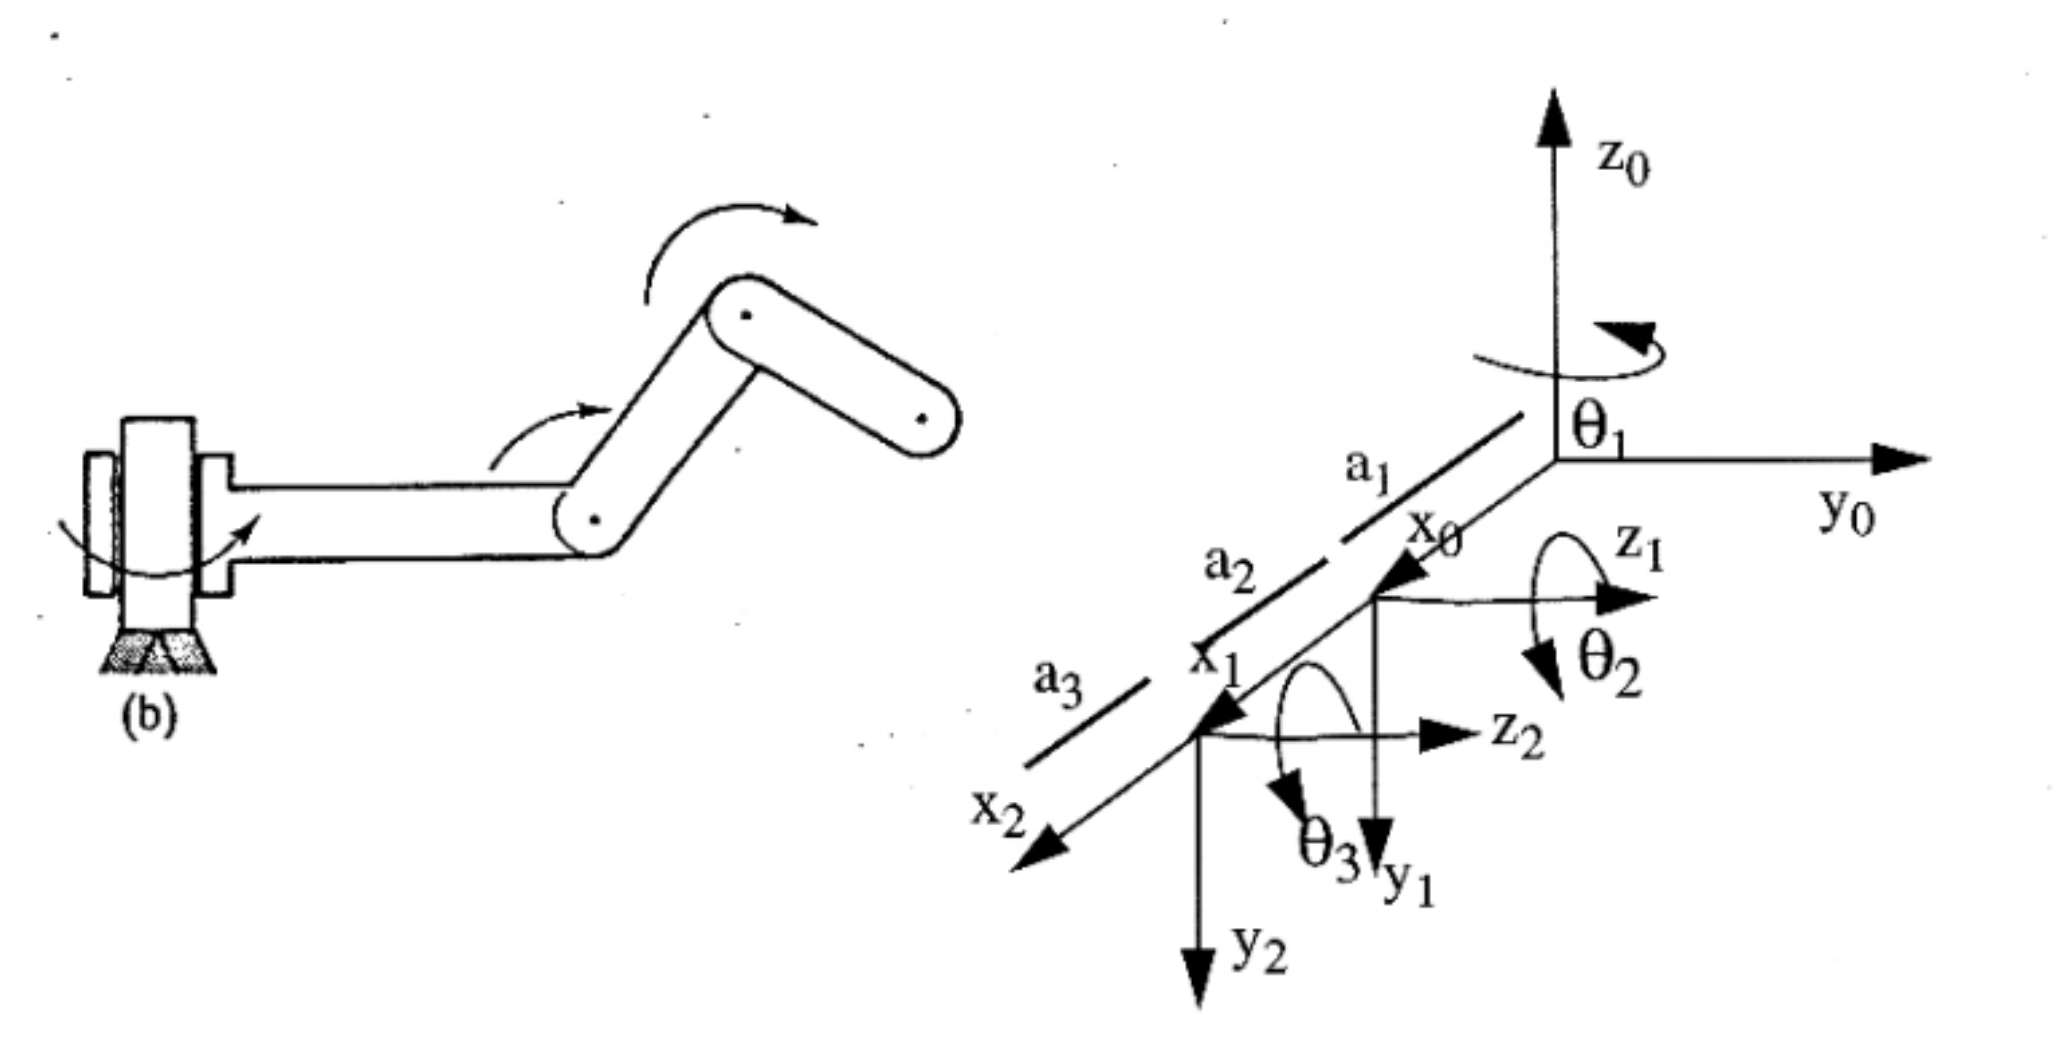

In [ ]:
"""
Please use the class structure below, and make sure your code can run the 
two tests included.  You may not use any kinematics libraries in your solution, 
although you may find it helpful to compare the outputs you calculate with the 
results from those libraries. 
"""

import numpy as np




class Robot:
	def __init__(self):
		'''TODO: write code to initialize your robot
		'''
		pass

	def forward_kinematics(self,joints):
		'''TODO: define this method to calculate the end effector position with 
		respect to the reference frame of the base. It accepts a list (or numpy 
		array) of joint angles [theta1, theta2, theta3] (as drawn above) as input, 
		and returns the (x, y, z) position of the end effector in 3-D space'''
		pass

        
	def inverse_kinematics(self, pos):
		'''TODO: define this method to calculate the robot's joint angles that yield
		a desired position pos = (x, y, z) in 3-D space. This method should
		return an array of joint angles, [theta1, theta2, theta3]. You may use 
		either of the numerical methods for IK introduced in the course in your 
		implementation. Tune the number of update steps and step sizes (i.e. values
		of lr or alpha) so that your code passes the test cases.'''
		pass

In [ ]:
"""
TEST CASES

Use these test cases to check your code.
"""
import numpy as np
from tabulate import tabulate

def test_forward_kinematics(robot):
    joints = [np.array([0,0,0]),
              np.array([0,np.pi/2,0]),
              np.array([0,0,np.pi/2]),
              np.array([np.pi/2,0,np.pi/2]),
              np.array([-np.pi,0,np.pi/2])]

    expected_results = [[57, 0, 0],
                        [25, 0, -32],   
                        [42, 0, -15],
                        [0, 42, -15], 
                        [-42, 0, -15]] 

    results = []
    for j,exp in zip(joints,expected_results):
        pos = robot.forward_kinematics(j)
        err = np.linalg.norm(pos - np.array(exp),1)
        results.append([j, pos.round(2), exp, np.round(err,2)])
    print(tabulate(results, headers=['Pos', 'Forward', 'Expected Result', 'L1 Error']))


def test_inverse_kinematics(robot):
    desired_pos = [np.array([57, 0, 0]),
                   np.array([25, 0, -32]),   
                   np.array([42, 0, -15]),
                   np.array([ 6.93,  4.0, 15.0]),
                   np.array([-8.0,  0.0, 15.0]),      
                   np.array([ -8.0,   0.0, -15.0])]   
    results = []
    for pos in desired_pos:
        joints = robot.inverse_kinematics(pos)
        forward_pos = robot.forward_kinematics(joints)
        err = np.linalg.norm(pos - np.array(forward_pos),1)

        results.append([pos, joints.round(2), robot.forward_kinematics(joints).round(2)])
    print(tabulate(results, headers=['Pos', 'IK Results', 'Forward Result']))


robot = Robot()
test_forward_kinematics(robot)
test_inverse_kinematics(robot)